<a href="https://colab.research.google.com/github/Toghrul-DataJedi/Toghrul-DataJedi/blob/main/Facebook%20Prophet%20forecast%20%22DAX%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
import pandas as pd
import plotly.express as px
from prophet import Prophet



In [16]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'



In [17]:
df= pd.read_csv("DAX.csv")

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-29,25.840000,25.879999,25.670000,25.809999,25.141266,39000
1,2022-11-30,25.860001,26.389999,25.690001,26.209999,25.530903,10300
2,2022-12-01,26.500000,26.510000,26.340000,26.389999,25.706240,4100
3,2022-12-02,26.270000,26.629999,26.270000,26.570000,25.881575,6400
4,2022-12-05,26.440001,26.520000,26.110001,26.110001,25.433495,4400
...,...,...,...,...,...,...,...
246,2023-11-21,29.260000,29.260000,29.059999,29.129999,29.129999,7200
247,2023-11-22,29.180000,29.209999,29.059999,29.129999,29.129999,2700
248,2023-11-24,29.330000,29.480000,29.330000,29.480000,29.480000,2600
249,2023-11-27,29.290001,29.459000,29.290001,29.340000,29.340000,1100


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,28.418960,28.567916,28.289932,28.443466,28.077505,12643.824701
std,1.336637,1.344945,1.341461,1.349632,1.363683,12978.073498
min,25.540001,25.639999,25.410999,25.490000,24.829557,0.000000
25%,27.384999,27.559999,27.275000,27.430000,27.255001,4600.000000
50%,28.525000,28.679001,28.370001,28.549999,28.219999,8500.000000
75%,29.510000,29.665500,29.353001,29.512500,29.165000,14600.000000
max,30.770000,30.889999,30.400000,30.750000,30.490000,90500.000000


In [21]:
# Line graph, Area graph, box plot(Analyzing price and volume)


In [22]:
px.area(df,x="Date",y="Close")

In [23]:
px.line(df,x="Date",y="Close")

In [24]:
px.area(df,x="Date",y="Volume")

In [25]:
px.bar(df,y="Volume")

In [26]:
px.box(df,y="Close")

In [27]:
#Data Preperation


In [28]:
columns=['Date',"Close"]
ndf= pd.DataFrame(df,columns=columns)

In [29]:
ndf

,Date,Close
0,2022-11-29,25.809999
1,2022-11-30,26.209999
2,2022-12-01,26.389999
3,2022-12-02,26.570000
4,2022-12-05,26.110001
...,...,...
246,2023-11-21,29.129999
247,2023-11-22,29.129999
248,2023-11-24,29.480000
249,2023-11-27,29.340000


In [30]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [31]:
prophet_df

,ds,y
0,2022-11-29,25.809999
1,2022-11-30,26.209999
2,2022-12-01,26.389999
3,2022-12-02,26.570000
4,2022-12-05,26.110001
...,...,...
246,2023-11-21,29.129999
247,2023-11-22,29.129999
248,2023-11-24,29.480000
249,2023-11-27,29.340000


In [32]:
#Creating Facebook Prophet Model
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfluctq2/odajqkl2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfluctq2/ey1c7h0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12167', 'data', 'file=/tmp/tmpyfluctq2/odajqkl2.json', 'init=/tmp/tmpyfluctq2/ey1c7h0t.json', 'output', 'file=/tmp/tmpyfluctq2/prophet_modelqmlzd5xd/prophet_model-20231129152654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-29,25.697591,24.807793,26.569951,25.697591,25.697591,0.009346,0.009346,0.009346,0.009346,0.009346,0.009346,0.0,0.0,0.0,25.706936
1,2022-11-30,25.734986,24.827234,26.588194,25.734986,25.734986,-0.025650,-0.025650,-0.025650,-0.025650,-0.025650,-0.025650,0.0,0.0,0.0,25.709336
2,2022-12-01,25.772382,24.884837,26.629072,25.772382,25.772382,-0.037747,-0.037747,-0.037747,-0.037747,-0.037747,-0.037747,0.0,0.0,0.0,25.734634
3,2022-12-02,25.809777,24.978251,26.664038,25.809777,25.809777,-0.019078,-0.019078,-0.019078,-0.019078,-0.019078,-0.019078,0.0,0.0,0.0,25.790699
4,2022-12-05,25.921964,25.064417,26.835939,25.921964,25.921964,0.017676,0.017676,0.017676,0.017676,0.017676,0.017676,0.0,0.0,0.0,25.939641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-12-24,27.594251,26.774521,28.514077,27.448916,27.731671,0.027726,0.027726,0.027726,0.027726,0.027726,0.027726,0.0,0.0,0.0,27.621978
277,2023-12-25,27.593521,26.677789,28.504443,27.437207,27.739282,0.017676,0.017676,0.017676,0.017676,0.017676,0.017676,0.0,0.0,0.0,27.611197
278,2023-12-26,27.592790,26.707851,28.509019,27.428509,27.751019,0.009346,0.009346,0.009346,0.009346,0.009346,0.009346,0.0,0.0,0.0,27.602136
279,2023-12-27,27.592060,26.679916,28.397918,27.417303,27.759551,-0.025650,-0.025650,-0.025650,-0.025650,-0.025650,-0.025650,0.0,0.0,0.0,27.566410


In [35]:
px.line(forecast,x='ds',y='yhat')

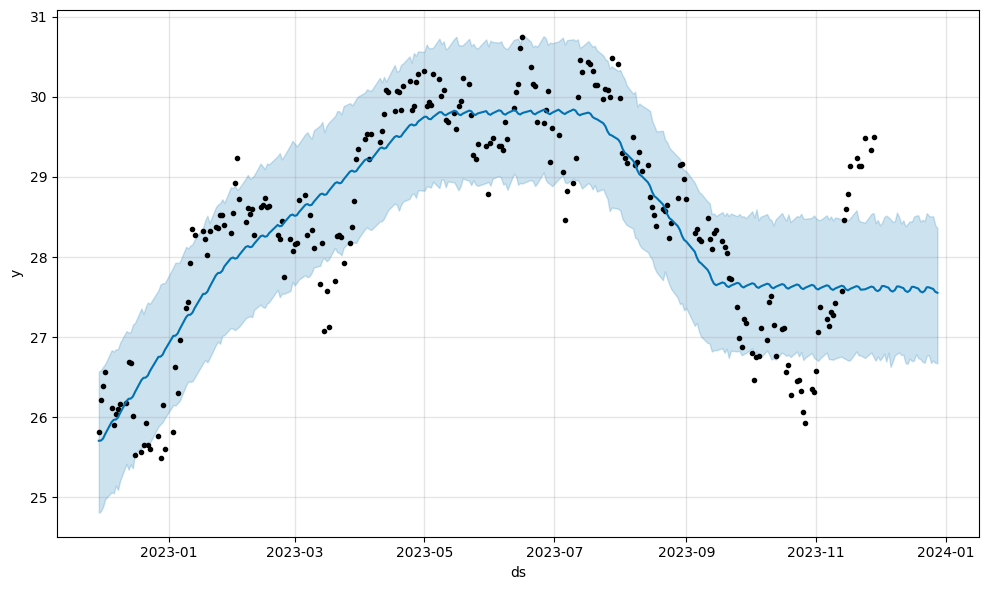

In [36]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

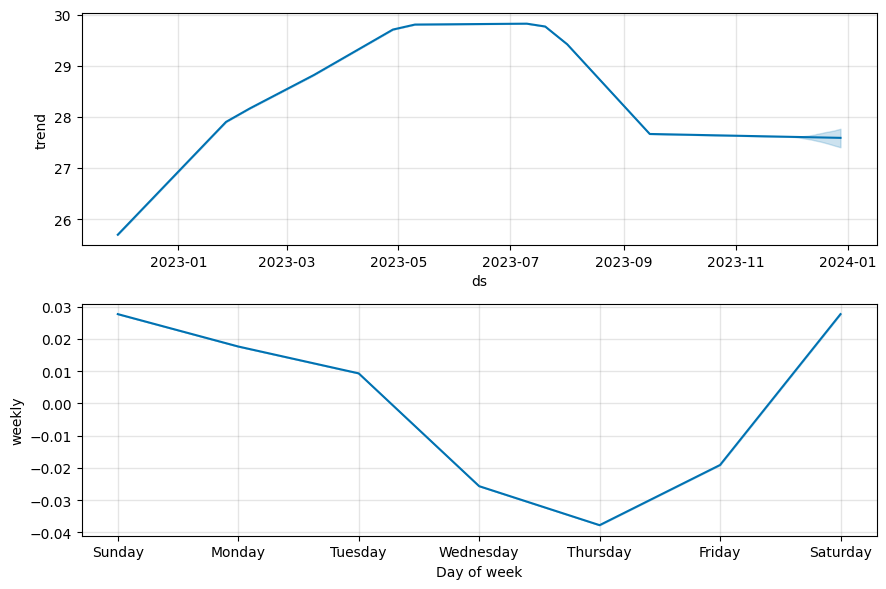

In [37]:
figure2=m.plot_components(forecast)

In [39]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>